##**Sensing, Perception, and Actuation Course**

**Primary Instructor: Ilya Afanasyev**

**TA: Karam Almaghout**

**Lab 2, 10 Nov. 2022**

## **Kalman Filter**

Kalman filtering is an algorithm that allows us to estimate the states of a system given the observations or measurements.

Applications: 

* object tracking. 
* autonomous navigation systems. 
* economics prediction.

### Linear Kalman Filter




In [59]:
import numpy as np
import matplotlib.pyplot as plt

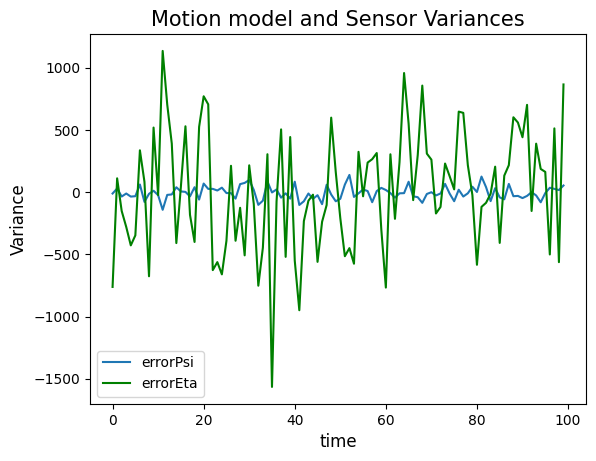

In [60]:

N = 100  # number of samples
time = np.arange(0, N, 1)
muPsi, sigmaPsi = 0, 50     # mean and standard deviation that describe the motion model error
muEta, sigmaEta = 0, 500     # mean and standard deviation that describe the sensor error
errorPsi = np.random.normal(muPsi, sigmaPsi, 100)   # pdf of the motion model error
errorEta = np.random.normal(muEta, sigmaEta, 100)   # pdf of the sensor error

plt.title('Motion model and Sensor Variances',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('Variance',fontsize=12)   
plt.plot(time, errorPsi, label='errorPsi')
plt.plot(time, errorEta, 'g', label='errorEta')
plt.legend()

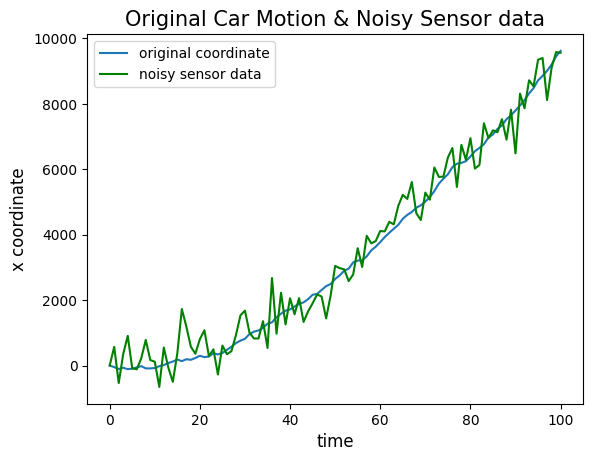

In [61]:
# Creation of the toycar's GPS data

a = 2  # acceleration
x = np.zeros(N+1)
z = np.zeros(N+1)

time = np.arange(0, N+1, 1)

for t in range(0, N):
    x[t+1] = x[t] + a * t + np.random.normal(muPsi, sigmaPsi, 1)
    z[t+1] = x[t+1] + np.random.normal(muEta, sigmaEta, 1)

plt.title('Original Car Motion & Noisy Sensor data',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)    
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, 'g', label='noisy sensor data')  
plt.legend()

In [62]:
x

array([   0.        ,  -48.82021801, -107.24390422,  -67.91331905,
       -111.76324071,  -94.68841347,  -59.34484759,  -18.98288333,
        -87.57238256,  -89.18205754,  -75.69467233,  -20.84005562,
         13.72303522,   76.23821643,  121.3247937 ,  182.31417626,
        133.59006586,  192.58004324,  175.00482857,  230.99124279,
        297.35406183,  256.33165881,  275.09596043,  379.83294946,
        338.51504899,  384.05202275,  480.62969239,  572.71763065,
        687.27729982,  760.3440025 ,  817.16038017,  962.99705454,
       1036.3283462 , 1072.17640859, 1153.92449589, 1276.60061812,
       1319.30672211, 1478.87798168, 1584.90374655, 1678.34168713,
       1714.4590895 , 1805.52428795, 1883.20479532, 1930.85460325,
       2027.95172894, 2163.16752371, 2188.64027361, 2311.6981712 ,
       2426.0470878 , 2492.28582509, 2646.77034114, 2755.55090236,
       2896.46272336, 2961.80337408, 3154.16812579, 3209.28366351,
       3217.37559999, 3337.2732197 , 3520.71612953, 3633.09424

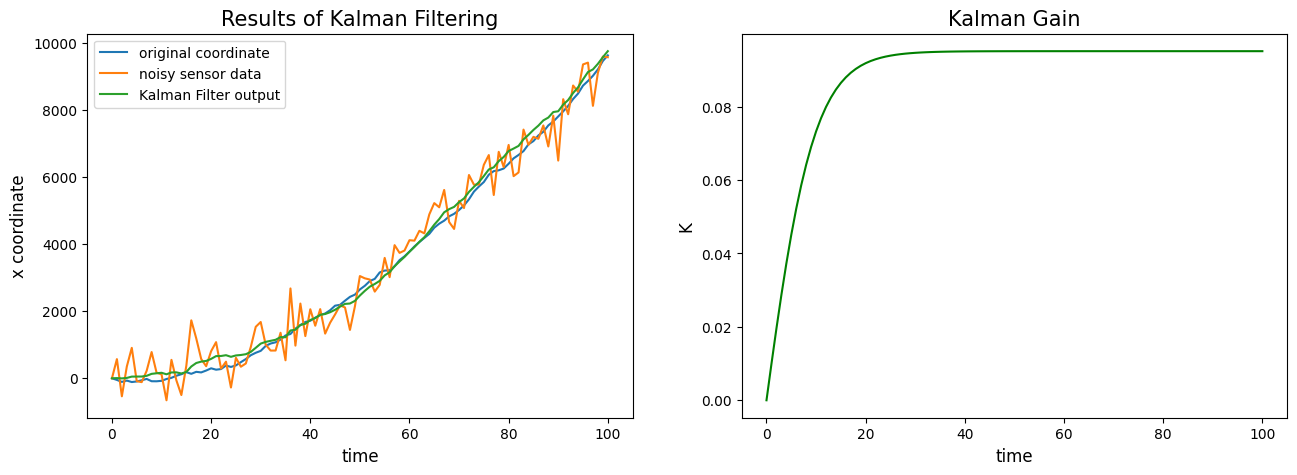

In [63]:
# Linear Kalman Filter

eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)

for t in range(0, N):
    eOpt[t+1] = np.sqrt((0.1*sigmaEta**2) * (eOpt[t]**2 + 0.1*sigmaPsi**2)/(0.1*sigmaEta**2 + eOpt[t]**2 + 0.1*sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(0.1*sigmaEta**2)
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]

plt.subplot(1,2,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Results of Kalman Filtering',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, label='noisy sensor data')  
plt.plot(time, xOpt, label='Kalman Filter output') 
plt.legend()

plt.subplot(1,2,2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Kalman Gain',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('K',fontsize=12)
plt.plot(time, K, 'g', label='Kalman Gain') 
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

### Kalman Filter Algorithm
The basic idea of the Kalman filter is to make a forward projection state (predicts the next state) based on a prior knowledge of the state.

The Kalman Filter estimates the state of a system at time $k$, assuming that the state of a system at a time $k$ evolved from the prior state at time $k-1$ as written in the following form:

$x_k = A \cdot x_{k-1} + B \cdot u_{k-1} + w_{k-1}$

The measurement model describes a relation between the state and measurement at step $k$

$z_k = H \cdot x_k + v_k$

What are $A \ , B \ ,H \ , w \ , v$ ?

### Kalman Equations

What are ***priori*** and ***posteriori*** estimates?

Kalman filter has two main sets of equations (or steps):

**Prediction Equations**

$\hat{x}_k^- = A \cdot \hat{x}_{k-1} + B \cdot u_{k-1}$

$P_k^- = A \cdot P_{k-1} \cdot A^T + Q$

**Update Equations**

$K_k = P_k^- \cdot H^T (HP_k^-H^T + R)^{-1}$

$\hat{x}_k = \hat{x}_k^- + K_k(z_k - H \hat{x}_k^-)$

$P_k = (I - K_kH)P_k^-$


![picture](https://machinelearningspace.com/wp-content/uploads/2020/02/Kalman-550x298.png)

## Implementation - Tracking a moving object in 1D

Modeling a moving object following a path given as follows:

$f(t) = 0.5*(t^2 - 2*t +1)$

track the object using Kalman filter from $t=0$ to $t=150$

### build the model state space and required matrices 

**Position**

$x_k = x_{k-1} + \dot{x}_{k-1} \Delta{t} + 0.5 \ddot{x}_{k-1} \Delta{t}^2$

**Velocity**

$\dot{x}_k = \dot{x}_{k-1} + \ddot{x}_{k-1} \Delta{t}$

$A = \begin{bmatrix} 1 & \Delta{t} \\
0 & 1\end{bmatrix}$, 
$B = \begin{bmatrix} 0.5\Delta{t}^2 \\
\Delta{t}\end{bmatrix}$

$H = \begin{bmatrix} 1 & 0\end{bmatrix}$

$Q = \begin{bmatrix} \sigma_x^2 &\sigma_x\sigma_{\dot{x}} \\
\sigma_{\dot{x}}\sigma_x & \sigma_{\dot{x}}^2\end{bmatrix}$$ = \begin{bmatrix} \frac{\Delta{t}^4}{4} & \frac{\Delta{t}^3}{2} \\
\frac{\Delta{t}^3}{2} & \Delta{t}^2\end{bmatrix} \sigma_a^2$

$R = \sigma_z^2$




In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class KalmanFilter(object):
    def __init__(self, dt, u, std_acc, std_meas):
        self.dt = dt
        self.u = u
        self.std_acc = std_acc
        self.A = np.matrix([[1, self.dt],
                            [0, 1]])
        self.B = np.matrix([[(self.dt**2)/2], [self.dt]]) 
        self.H = np.matrix([[1,0]])
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0],[0]])

    def predict(self):
      
        # Update time state
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)

        # Calculate error covariance
        
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):
        
        
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R

        # Calculate the Kalman Gain
        
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  

        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  

        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P 


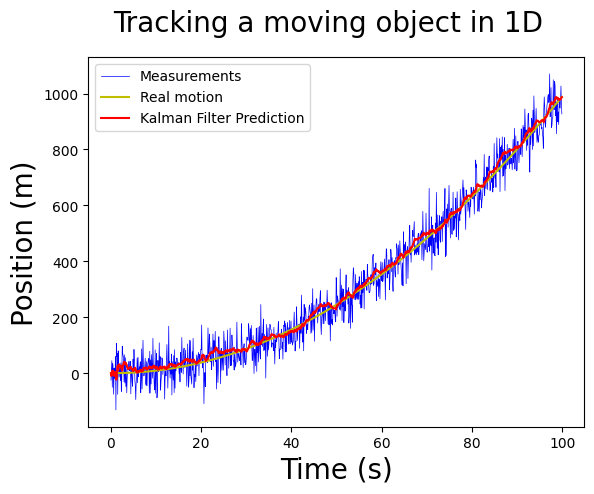

In [66]:
def main():
    dt = 0.1
    t = np.arange(0, 100, dt)
    # Define a model track
    real_track = 0.1*((t**2) - t)
    u= 2
    # assume that the standard deviation of the process and the measurement
    std_acc = 0.25    
    std_meas = 1.2    
    # create KalmanFilter object
    kf = KalmanFilter(dt, u, std_acc, std_meas)
    predictions = []
    measurements = []
    for x in real_track:
        # Mesurement ()
        z = kf.H * x + np.random.normal(0, 50)
        measurements.append(z.item(0))
        predictions.append(kf.predict()[0])
        kf.update(z.item(0))
    fig = plt.figure()
    fig.suptitle('Tracking a moving object in 1D', fontsize=20)
    plt.plot(t, measurements, label='Measurements', color='b',linewidth=0.5)
    plt.plot(t, np.array(real_track), label='Real motion', color='y', linewidth=1.5)
    plt.plot(t, np.squeeze(predictions), label='Kalman Filter Prediction', color='r', linewidth=1.5)
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('Position (m)', fontsize=20)
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

In [72]:
    dt = 0.1
    t = np.arange(0, 100, dt)
    t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [70]:
np.matrix([[(dt**2)/2], [dt]])

array([   0.        ,  571.35323796, -536.33417415,  351.71913864,
        906.81139751,  -85.75901018, -114.6141749 ,  222.54935762,
        781.75057352,  167.02303569,  116.5912816 , -654.62430043,
        549.63846395,  -63.85869267, -498.67164959,  373.54472958,
       1727.02990161, 1189.02592317,  574.33405765,  360.5543783 ,
        807.04865793, 1076.63050676,  288.07079302,  494.97596145,
       -274.88453644,  610.74250267,  344.70618615,  441.2052657 ,
        932.21034265, 1533.7732925 , 1677.13052582, 1003.40423793,
        825.87582677,  827.22296504, 1356.2333429 ,  536.76563254,
       2676.62093758,  973.2835484 , 2226.0427857 , 1257.35932016,
       2056.46013977, 1566.05353883, 2060.55955627, 1331.45784498,
       1655.81591701, 1902.88021378, 2172.36168619, 2110.04608329,
       1441.14728137, 2144.26446129, 3045.88351343, 2977.61381958,
       2941.66172296, 2582.3996579 , 2784.40214999, 3586.73714095,
       3012.60113568, 3966.07100498, 3736.08075618, 3805.84116


Model Equation

$x_{k+1} = x_k + a \cdot t\Delta{t} + \hat{\sigma_x}$

Measurement Equation

$z_{k+1} = x_{k+1} + \hat{\sigma_z}$


Linear Kalman Filter Equations

$e_{k+1}^2 = \frac{\sigma_z^2 (e_k^2 + \sigma_x^2)}{e_k^2 + \sigma_z^2 + \sigma_x^2 }$

$K_{k+1} = \frac{e_{k+1}^2}{\sigma_z^2}$

$x_{k+1}^{opt} = K_{k+1} z_{k+1} + (1-K_{k+1})(x_{k}^{opt} + u_k)$

## Exercise

Implementation of Kalman Filter for tracking an object in 2D.

The video is a representation of tracking an object by a camera. the object moves in 2 dimensions
your task is to extend the Kalman Filter class to estimate the position state in $x$ and $y$
Following is the model of the system

$\begin{bmatrix} x_k \\ y_k \\\dot{x}_k \\ \dot{y}_k\end{bmatrix} = \begin{bmatrix} x_{k-1} + \dot{x}_{k-1} \Delta{t} + 0.5\ddot{x}_{k-1}\Delta{t}^2 \\
y_{k-1} + \dot{y}_{k-1} \Delta{t} + 0.5\ddot{y}_{k-1}\Delta{t}^2\\
\dot{x}_{k-1} + \ddot{x}_{k-1}\Delta{t}\\
\dot{y}_{k-1} + \ddot{y}_{k-1}\Delta{t}
\end{bmatrix}$

In [67]:
!wget "https://www.dropbox.com/s/kso1mge5dgtpnl1/video_randomball.avi?dl=0" -O video_randomball.avi

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [68]:
class KalmanFilter(object):
    def __init__(self, dt, u_x,u_y, std_acc, x_std_meas, y_std_meas):
        """
        :param dt: sampling time 
        :param u_x: acceleration in x-direction
        :param u_y: acceleration in y-direction
        :param std_acc: process noise magnitude
        :param x_std_meas: standard deviation of the measurement in x-direction
        :param y_std_meas: standard deviation of the measurement in y-direction
        """

        # Define sampling time
        self.dt = ### <write-your-code-here> ###

        # Define the  control input variables
        self.u = ### <write-your-code-here> ###

        # Intial State
        self.x = ### <write-your-code-here> ###

        # Define the State Transition Matrix A
        self.A = ### <write-your-code-here> ###

        # Define the Control Input Matrix B
        self.B = ### <write-your-code-here> ###

        # Define Measurement Mapping Matrix
        self.H = ### <write-your-code-here> ###

        #Initial Process Noise Covariance
        self.Q = ### <write-your-code-here> ###

        #Initial Measurement Noise Covariance
        self.R = ### <write-your-code-here> ###

        #Initial Covariance Matrix
        self.P = ### <write-your-code-here> ###

    def predict(self):

        # Update time state
        self.x = ### <write-your-code-here> ###

        # Calculate error covariance
        self.P = ### <write-your-code-here> ###
        return ### <write-your-code-here> ###

    def update(self, z):

        S = ### <write-your-code-here> ###

        # Calculate the Kalman Gain
        K =  ### <write-your-code-here> ###

        self.x = ### <write-your-code-here> ###

        I = ### <write-your-code-here> ###

        # Update error covariance matrix
        self.P = ### <write-your-code-here> ###
        return 

SyntaxError: invalid syntax (325303355.py, line 13)

In [ ]:

import cv2
from google.colab.patches import cv2_imshow

def detect(frame,debugMode):
    # Convert frame from BGR to GRAY
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if (debugMode):
        cv2_imshow(gray)

    # Edge detection using Canny function
    img_edges = cv2.Canny(gray,  50, 190, 3)
    if (debugMode):
        cv2_imshow(img_edges)

    # Convert to black and white image
    ret, img_thresh = cv2.threshold(img_edges, 254, 255,cv2.THRESH_BINARY)
    if (debugMode):
        cv2_imshow( img_thresh)

    # Find contours
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Set the accepted minimum & maximum radius of a detected object
    min_radius_thresh= 3
    max_radius_thresh= 30

    centers=[]
    for c in contours:
        (x, y), radius = cv2.minEnclosingCircle(c)
        radius = int(radius)

        #Take only the valid circle(s)
        if (radius > min_radius_thresh) and (radius < max_radius_thresh):
            centers.append(np.array([[x], [y]]))
    # cv2_imshow(img_thresh)
    return centers

In [ ]:
measured_x = []
measured_y = []
estimated_x = []
estimated_y = []
def main():
    frame_width,frame_height = 360, 640
    out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, (frame_height, frame_width))

   
    # Create opencv video capture object
    VideoCap = cv2.VideoCapture('video_randomball.avi')


    #Create KalmanFilter object KF
    #KalmanFilter(dt, u_x, u_y, std_acc, x_std_meas, y_std_meas)

    KF = ### <write-your-code-here> ###

    debugMode=0

    while(True):
        # Read frame
        ret, frame = VideoCap.read()

        if not ret:
            VideoCap.release()
            out.release()
            break

        # Detect object
        centers = detect(frame,debugMode)
        measured_x.append(centers[0][0])
        measured_y.append(centers[0][1])
        # If centroids are detected then track them
        if (len(centers) > 0):

            # Draw the detected circle
            cv2.circle(frame, (int(centers[0][0]), int(centers[0][1])), 10, (0, 191, 255), 2)

            # Predict
            (x, y) = ### <write-your-code-here> ###
            
            # Draw a rectangle as the predicted object position
            cv2.rectangle(frame, (int(x.item(0)) - 15, int(y.item(0)) - 15), (int(x.item(0)) + 15, int(y.item(0)) + 15), (255, 0, 0), 2)

            # Update
            (x1, y1) = ### <write-your-code-here> ###
            estimated_x.append(x1.item(0))
            estimated_y.append(y1.item(0))
            # Draw a rectangle as the estimated object position
            cv2.rectangle(frame, (int(x1.item(0)) - 15, int(y1.item(0)) - 15), (int(x1.item(0)) + 15, int(y1.item(0)) + 15), (0, 0, 255), 2)

            cv2.putText(frame, "Estimated Position", (int(x1.item(0)) + 15, int(y1.item(0)) + 10), 0, 0.5, (0, 0, 255), 2)
            cv2.putText(frame, "Predicted Position", (int(x.item(0)) + 15, int(y.item(0))), 0, 0.5, (255, 0, 0), 2)
            cv2.putText(frame, "Measured Position", (int(centers[0][0] + 15), int(centers[0][1] - 15)), 0, 0.5, (0,191,255), 2)

        
        out.write(frame)
       
        if cv2.waitKey(2) & 0xFF == ord('q'):
            VideoCap.release()
            cv2.destroyAllWindows()
            out.release()
            break

    out.release()

if __name__ == "__main__":
    # execute main
    main()


In [ ]:
plt.title('2D object tracking',fontsize=15)
plt.xlabel('x coordinate',fontsize=12)
plt.ylabel('y coordinate',fontsize=12)    
plt.plot(measured_x[1:], measured_y[1:], 'r', label='original coordinate')  
plt.plot(estimated_x, estimated_y, 'g', label='estimated position')  
plt.legend()